In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV



In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv(r"C:\Users\lucius seneca\CampusX\Project\Cardiovascular_Risk_Prediction\Dataset\data_cardiovascular_risk.csv",index_col="id")

In [5]:
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [6]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [8]:
# Shape of the Dataset
df.shape

(3390, 16)

In [9]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [10]:
#Duplicate data
df.duplicated()

id
0       False
1       False
2       False
3       False
4       False
        ...  
3385    False
3386    False
3387    False
3388    False
3389    False
Length: 3390, dtype: bool

In [11]:
# Missing values in the dataset
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [12]:
#Missing vlaues percentage
round(df.isnull().sum()/len(df) * 100,2)

age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

<Axes: >

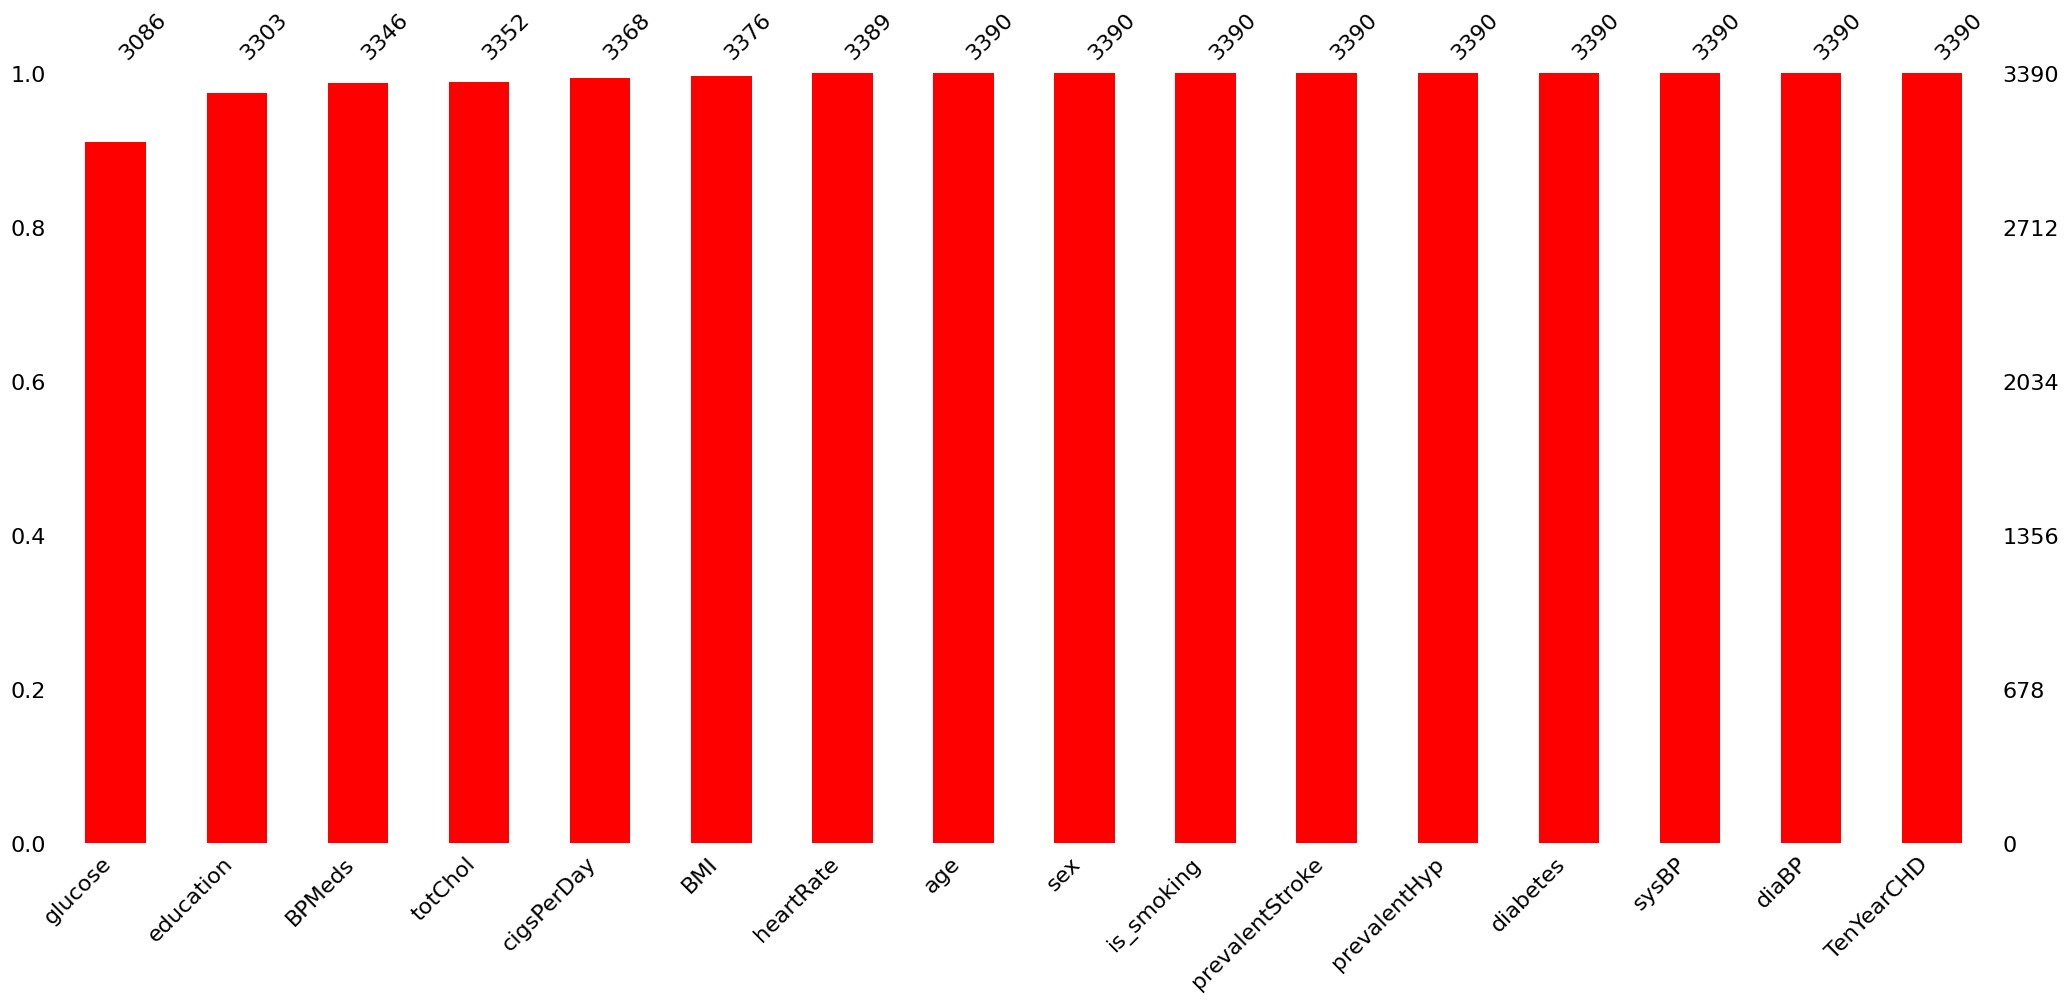

In [13]:
#Visualizing missing value
import missingno as msno
msno.bar(df,color="red",sort="ascending")

<Axes: >

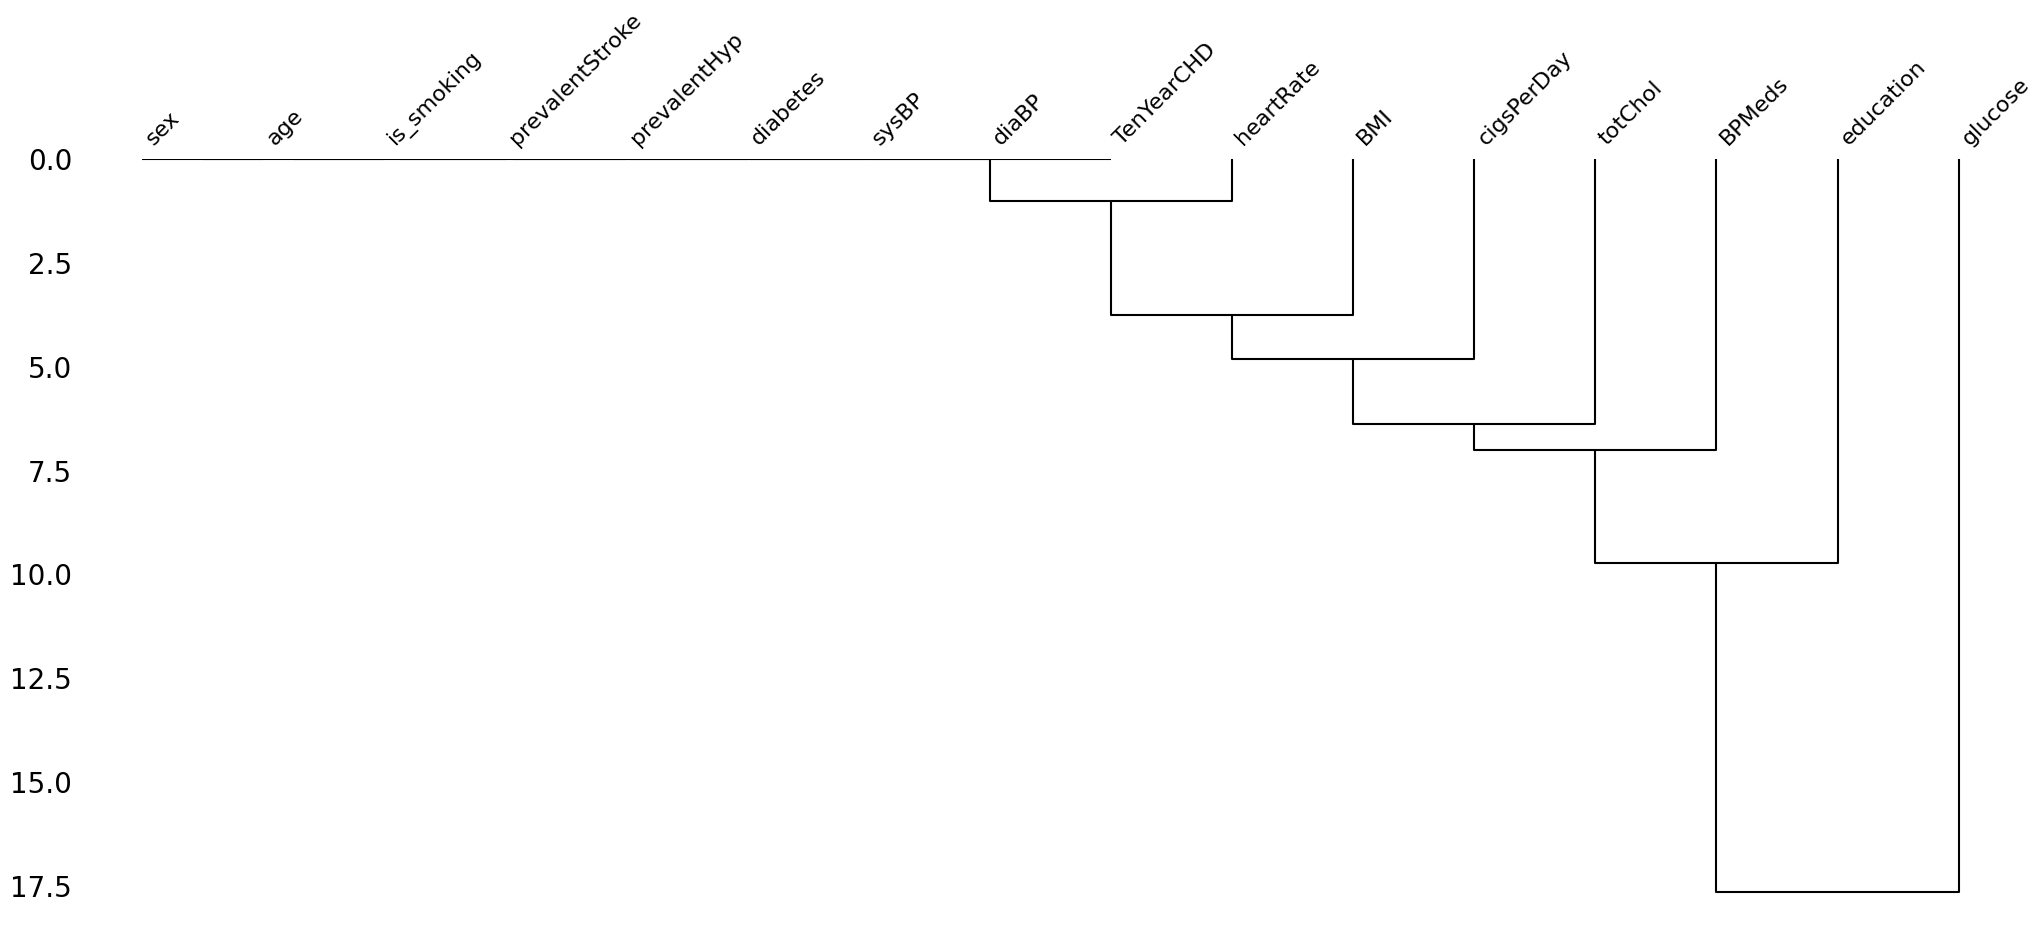

In [14]:
msno.dendrogram(df)

<Axes: ylabel='id'>

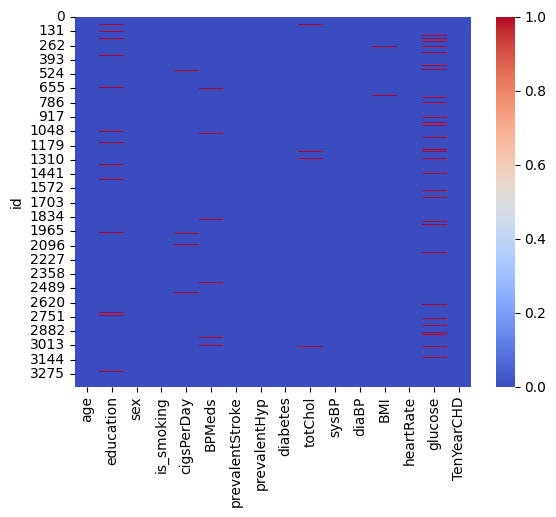

In [15]:
sns.heatmap(df.isnull(),cmap="coolwarm")

In [16]:
#Dataset columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [17]:
#Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5


In [18]:
#Numeric and Categorical Features
numeric_features=[]
categorical_features=[]

for col in df.columns:
    if df[col].nunique() > 10:
        numeric_features.append(col)
    else:
        categorical_features.append(col)
    
print(f"numeric features: {numeric_features}")

print(f"categorical features:{categorical_features}")

numeric features: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical features:['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


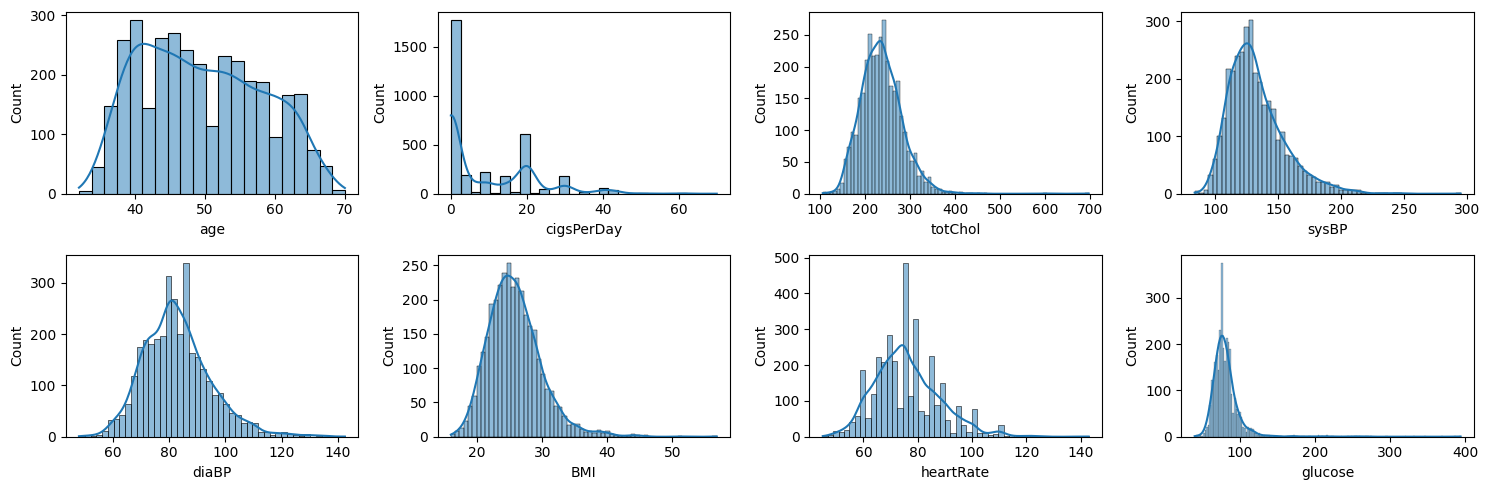

In [19]:
#Univariate Analysis
plt.figure(figsize=(15,5))
for i,col in enumerate(numeric_features):
    plt.subplot(2,4,i+1)
    sns.histplot(df[col],kde=True)
    plt.xlabel(col)
    plt.tight_layout()

## Observation: We can say that glucose has many outliers because it heavely right skewed

In [20]:
#Outlier Analysis
import plotly.express as px
for col in numeric_features:
    fig=px.box(df,y=col,title=f"Box Plot of {col}")
    fig.show()

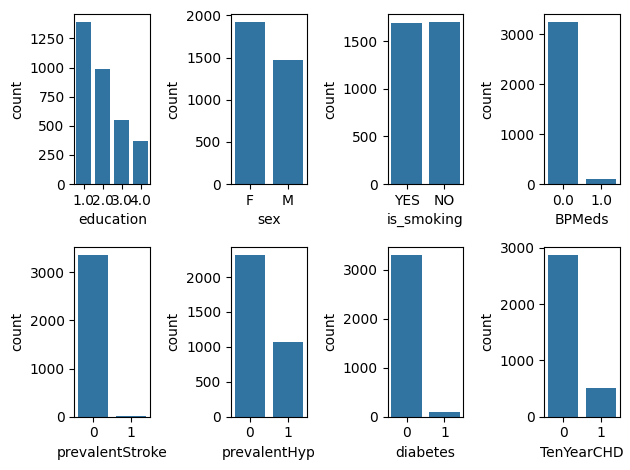

In [21]:
#Univariate Analysis of categorical features
for i,col in enumerate(categorical_features):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[col])
    plt.xlabel(col)
    plt.tight_layout()

## Data Cleaning

In [22]:
df.duplicated().sum()

0

In [23]:
# Missing value

df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [24]:
# Missing value percentage
round(df.isnull().sum()/len(df)*100,2)

age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

In [25]:
# features which has less than 5% missing value
nan_col=["education","cigsPerDay","BPMeds","totChol","BMI","heartRate"]
#dropping null values
df.dropna(subset=nan_col,inplace=True)

In [26]:
df.isnull().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            262
TenYearCHD           0
dtype: int64

<Axes: xlabel='glucose', ylabel='Count'>

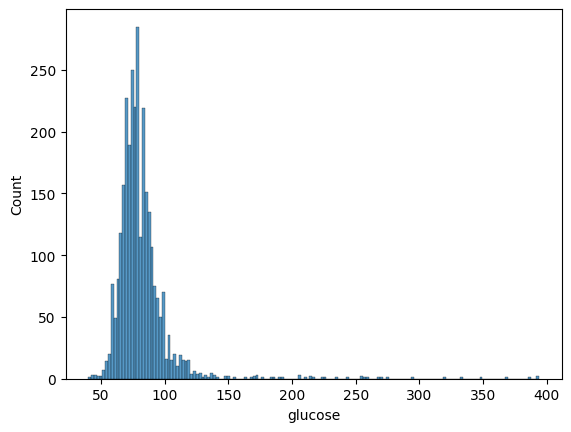

In [27]:
sns.histplot(df["glucose"])

In [28]:
df.isnull().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            262
TenYearCHD           0
dtype: int64

In [29]:
df["glucose"]=df["glucose"].fillna(value=df["glucose"].median())

In [30]:
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

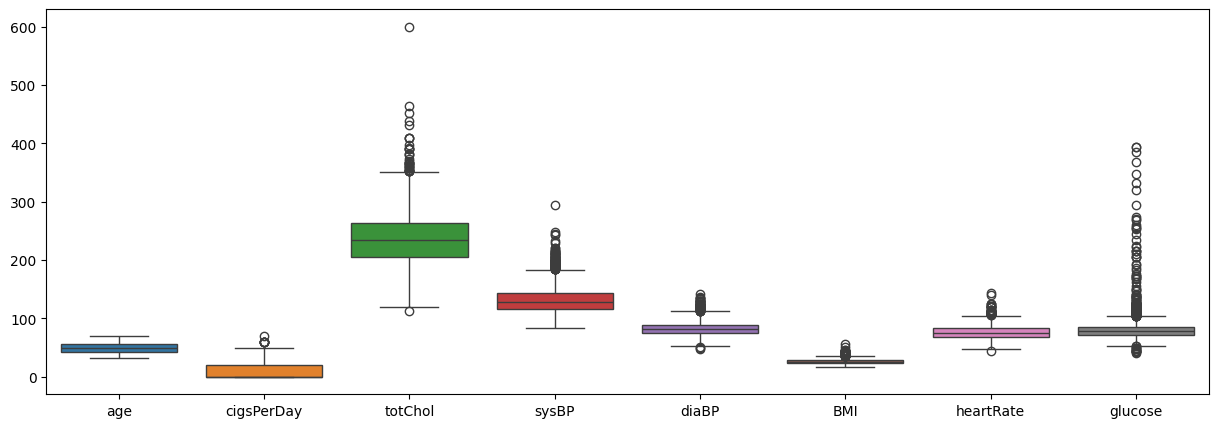

In [31]:
#Treating Outlier
plt.figure(figsize=(15,5))

sns.boxplot(data=df[numeric_features])
plt.show()

In [32]:
# capping outlier
def clip_outlier(df):
    for col in df[numeric_features]:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        df[col]=df[col].clip(lower_bound,upper_bound)
    return df

In [33]:
df=clip_outlier(df)

<Axes: >

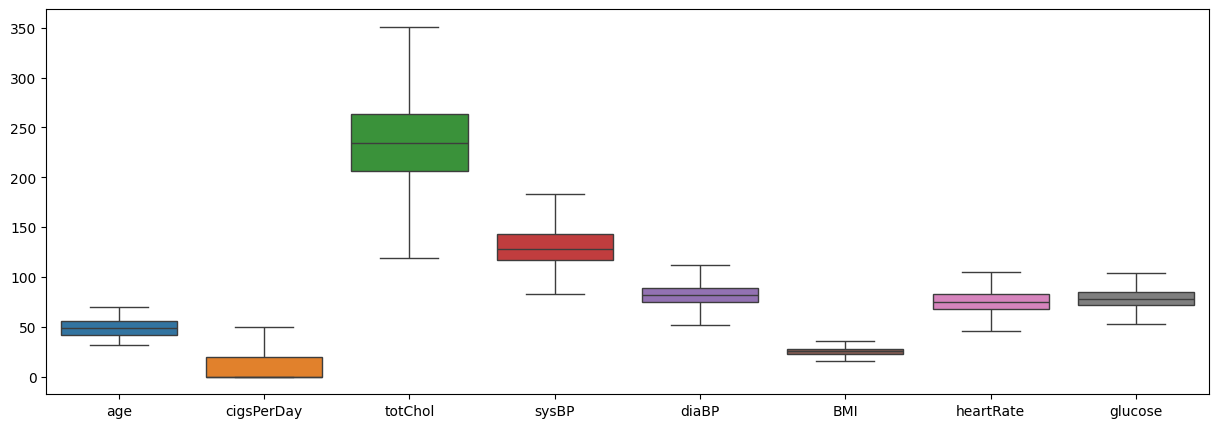

In [34]:
#Checking boxplot
plt.figure(figsize=(15,5))

sns.boxplot(data=df[numeric_features])

## Feature Engineering

In [35]:
#Label Encoding

df["sex"]=df["sex"].map({"M":1,"F":0})
df["is_smoking"]=df["is_smoking"].map({"YES":1,"NO":0})

In [36]:
df.dtypes

age                  int64
education          float64
sex                  int64
is_smoking           int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [37]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,112.0,32.80,85.0,65.0,1


In [38]:
df["education"].value_counts()

education
1.0    1338
2.0     960
3.0     531
4.0     360
Name: count, dtype: int64

In [39]:
#Onehot Encoding the "education" feature

education_onehot=pd.get_dummies(df["education"],prefix="education",drop_first=True)
df.drop("education",axis=1,inplace=True)

df=pd.concat([df,education_onehot],axis=1)
df.head(3)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_2.0,education_3.0,education_4.0
id,,,,,,,,,,,,,,,,,,
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,False,False,True
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,False,False,False
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,False,False,False


## Feature Manipulation


<Axes: >

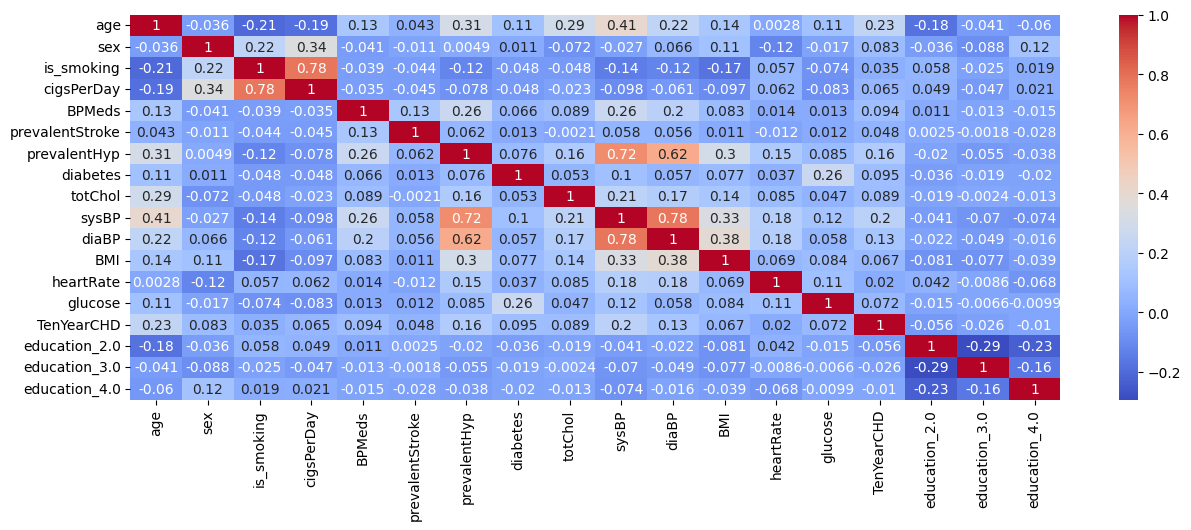

In [40]:
#Plotting correlation coefficient heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [41]:
#adding new column PulsePresure
df["pulse_pressure"]=df["sysBP"]-df["diaBP"]
#dropping the sysBp and diaBP columns
df.drop(columns=["sysBP","diaBP"],inplace=True)

In [42]:
# dropping is_smoking dute to high multicollinearity 
df.drop("is_smoking",axis=1,inplace=True)

In [43]:
df.head(2)

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,education_2.0,education_3.0,education_4.0,pulse_pressure
id,,,,,,,,,,,,,,,,
1,36,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,False,False,True,70.0
2,46,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,False,False,False,45.0


<Axes: >

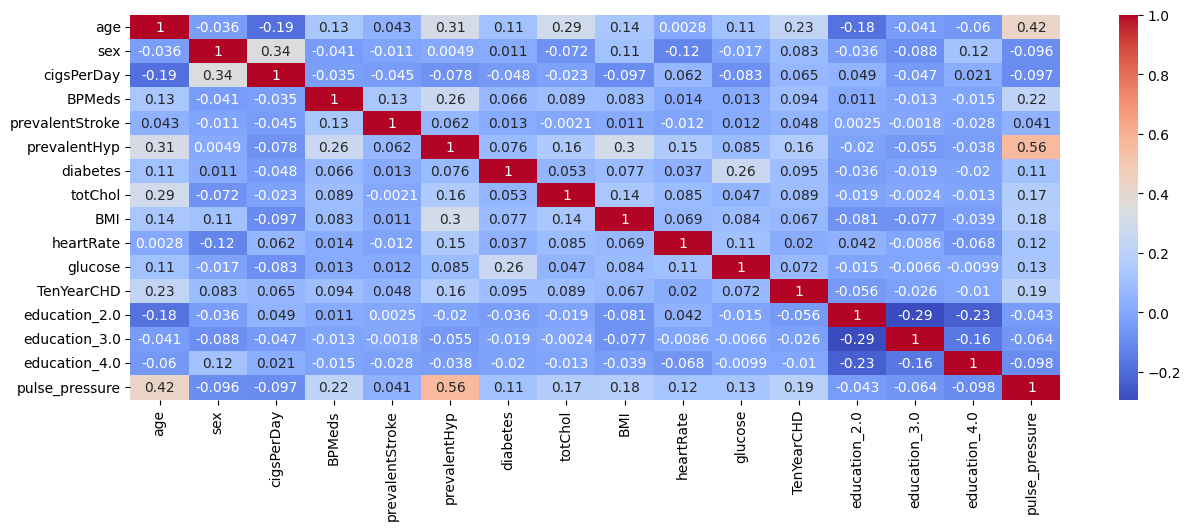

In [44]:
#plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [45]:
X=df.drop(columns="TenYearCHD")

In [46]:
y=df["TenYearCHD"]

In [47]:
X

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,education_2.0,education_3.0,education_4.0,pulse_pressure
id,,,,,,,,,,,,,,,
1,36,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,False,False,True,70.0
2,46,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,False,False,False,45.0
3,50,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,False,False,False,70.0
4,64,0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,False,False,False,51.5
5,61,0,0.0,0.0,0,1,0,272.0,32.80,85.0,65.0,False,True,False,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,0,0.0,0.0,0,1,0,217.0,26.98,105.0,104.5,False,False,False,96.0
3385,60,0,0.0,0.0,0,0,0,261.0,29.28,70.0,103.0,False,False,False,44.5
3386,46,0,0.0,0.0,0,0,0,199.0,21.96,80.0,84.0,False,False,False,46.0


<Axes: xlabel='TenYearCHD'>

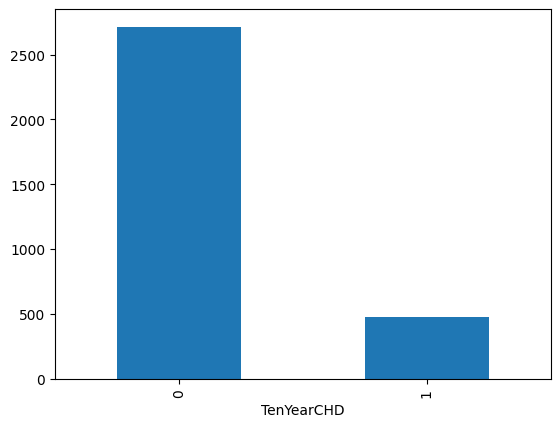

In [48]:
#Handling Imbalance Target variable
df["TenYearCHD"].value_counts().plot(kind="bar")

In [49]:
#SMOTE implementation
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f'Before Handling Imbalanced Class {Counter(y)}')
smote=SMOTE(random_state=42)

X,y=smote.fit_resample(X,y)
print(f'After Handling Imbalanced Class {Counter(y)}')


Before Handling Imbalanced Class Counter({0: 2714, 1: 475})
After Handling Imbalanced Class Counter({0: 2714, 1: 2714})


## Model Building

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)

print(X_train.shape)
print(X_test.shape)

(4342, 15)
(1086, 15)


In [51]:
# Standard Scaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [52]:
X_train

array([[ 0.93266486,  1.25694742,  1.73873415, ..., -0.51098875,
        -0.41502557, -0.46857663],
       [-0.63271234, -0.79557823, -0.28881912, ..., -0.51098875,
         2.40949012, -1.87952465],
       [ 0.93266486, -0.79557823, -0.80427892, ...,  1.95699027,
        -0.41502557,  2.0528389 ],
       ...,
       [-0.87353961, -0.79557823, -0.80427892, ..., -0.51098875,
        -0.41502557,  1.42787156],
       [-1.11436687, -0.79557823, -0.80427892, ..., -0.51098875,
        -0.41502557, -1.80311424],
       [ 0.21018308, -0.79557823,  0.89106313, ..., -0.51098875,
        -0.41502557, -0.7144125 ]])

Model Training

In [53]:
model_result=[]

def predict(ml_model,model_name):

    model=ml_model.fit(X_train,y_train)

    #prediction

    y_pred=model.predict(X_test)

    '''Performance Metrics'''
    test_accuracy=accuracy_score(y_test,y_pred)
    print(f"test accuracy:{test_accuracy}")

    test_precision=precision_score(y_test,y_pred)
    print(f"precision score:{test_precision}")

    test_recall=recall_score(y_test,y_pred)
    print(f"recall score:{test_recall}")

    test_f1=f1_score(y_test,y_pred)
    print(f"test f1 score:{test_f1}")

In [54]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
predict(LogisticRegression(),"Logistic Regression")

test accuracy:0.6860036832412523
precision score:0.7113594040968343
recall score:0.6725352112676056
test f1 score:0.6914027149321267


In [57]:
from sklearn.tree import DecisionTreeClassifier


In [58]:
predict(DecisionTreeClassifier(),"Decision Tree Classifier")

test accuracy:0.7918968692449355
precision score:0.798951048951049
recall score:0.8045774647887324
test f1 score:0.8017543859649123


In [59]:
from sklearn.ensemble import RandomForestClassifier
predict(RandomForestClassifier(),"Random Forest classifier")

test accuracy:0.8655616942909761
precision score:0.8767857142857143
recall score:0.8644366197183099
test f1 score:0.8705673758865248
